# Import the packages and modules

In [1]:
from gym_vrp.envs import SantaIRPEnv
from agents import IRPAgent

import torch


## Train the agent

In [2]:
# Original
# batch_size = 256
# seed = 69
# num_nodes = 20

# Quick Test
# batch_size = 10
# seed = 23
# num_nodes = 5

batch_size = 64
seed = 23
num_nodes = 5

num_epochs = 51
# num_epochs = 251

In [3]:
# Instantiate the SantaIRPEnv environment
env_santa_irp = SantaIRPEnv(num_nodes=num_nodes, batch_size=batch_size, seed=seed)

# Instantiate the IRPAgent (assuming it's compatible with SantaIRPEnv)
agent_santa_irp = IRPAgent(
    seed=seed, csv_path=f"./train_logs/loss_log_santa_irp_{num_nodes}_{seed}.csv",
)
# Train the agent
agent_santa_irp.train(
    env_santa_irp,
    epochs=num_epochs,
    check_point_dir=f"./check_points/santa_irp_{num_nodes}_{seed}/",
)

INFO:root:Start Training
INFO:root:Update Baseline
INFO:root:Epoch 0 finished - Loss: 89.68342590332031, Advantage: -19.904674530029297 Dist: -23.25672149658203
INFO:root:Update Baseline
INFO:root:Epoch 1 finished - Loss: -90.03321075439453, Advantage: 20.03036880493164 Dist: -23.162742614746094
INFO:root:Update Baseline


replacing baceline


INFO:root:Epoch 2 finished - Loss: 88.52252960205078, Advantage: -19.701171875 Dist: -3.450554847717285
INFO:root:Update Baseline


replacing baceline


INFO:root:Epoch 3 finished - Loss: 82.36225128173828, Advantage: -19.717945098876953 Dist: -3.3145313262939453
INFO:root:Update Baseline
INFO:root:Epoch 4 finished - Loss: -0.5531122088432312, Advantage: 0.16634520888328552 Dist: -23.084754943847656
INFO:root:Update Baseline


replacing baceline


INFO:root:Epoch 5 finished - Loss: -1.6492877006530762, Advantage: 0.4239818751811981 Dist: -23.19221305847168
INFO:root:Update Baseline
INFO:root:Epoch 6 finished - Loss: -1.1001404523849487, Advantage: 0.3221879303455353 Dist: -23.5146484375


replacing baceline


INFO:root:Update Baseline
INFO:root:Epoch 7 finished - Loss: 145.56759643554688, Advantage: -39.770286560058594 Dist: 16.72262954711914
INFO:root:Update Baseline
INFO:root:Epoch 8 finished - Loss: -72.821044921875, Advantage: 20.25127601623535 Dist: -23.29433822631836
INFO:root:Update Baseline
INFO:root:Epoch 9 finished - Loss: 71.8687744140625, Advantage: -19.691221237182617 Dist: -3.25956392288208
INFO:root:Update Baseline
INFO:root:Epoch 10 finished - Loss: -1.3351411819458008, Advantage: 0.3116088807582855 Dist: -3.3386495113372803
INFO:root:Update Baseline
INFO:root:Epoch 11 finished - Loss: 133.3577423095703, Advantage: -39.789913177490234 Dist: 36.65004348754883
INFO:root:Update Baseline
INFO:root:Epoch 12 finished - Loss: 66.04468536376953, Advantage: -19.68258285522461 Dist: 16.720335006713867
INFO:root:Update Baseline
INFO:root:Epoch 13 finished - Loss: 69.04563903808594, Advantage: -19.688819885253906 Dist: -3.1999318599700928
INFO:root:Update Baseline
INFO:root:Epoch 14 fin

replacing baceline


INFO:root:Epoch 30 finished - Loss: -0.4749125838279724, Advantage: 0.1368778944015503 Dist: -23.332338333129883
INFO:root:Update Baseline


replacing baceline


INFO:root:Epoch 31 finished - Loss: 61.52217483520508, Advantage: -19.971399307250977 Dist: -3.0298032760620117
INFO:root:Update Baseline
INFO:root:Epoch 32 finished - Loss: 0.06859180331230164, Advantage: -0.048430949449539185 Dist: -23.46320343017578
INFO:root:Update Baseline


replacing baceline


INFO:root:Epoch 33 finished - Loss: -61.582603454589844, Advantage: 19.857791900634766 Dist: -42.95832061767578
INFO:root:Update Baseline
INFO:root:Epoch 34 finished - Loss: 61.91438293457031, Advantage: -20.013761520385742 Dist: -3.168471336364746
INFO:root:Update Baseline
INFO:root:Epoch 35 finished - Loss: 59.008113861083984, Advantage: -20.064163208007812 Dist: 16.78230857849121
INFO:root:Update Baseline
INFO:root:Epoch 36 finished - Loss: 0.05356008559465408, Advantage: -0.07088333368301392 Dist: -43.04095458984375


replacing baceline


INFO:root:Update Baseline
INFO:root:Epoch 37 finished - Loss: 0.09630408138036728, Advantage: -0.03677785396575928 Dist: -23.183931350708008
INFO:root:Update Baseline
INFO:root:Epoch 38 finished - Loss: 0.3726400136947632, Advantage: -0.15484969317913055 Dist: -3.082333564758301
INFO:root:Update Baseline
INFO:root:Epoch 39 finished - Loss: -0.08118279278278351, Advantage: 0.01985916495323181 Dist: -23.129322052001953
INFO:root:Update Baseline
INFO:root:Epoch 40 finished - Loss: -56.126739501953125, Advantage: 19.850095748901367 Dist: -23.29172134399414
INFO:root:Update Baseline
INFO:root:Epoch 41 finished - Loss: -53.294559478759766, Advantage: 19.974369049072266 Dist: -23.164701461791992
INFO:root:Update Baseline
INFO:root:Epoch 42 finished - Loss: -108.41387939453125, Advantage: 39.8499755859375 Dist: -43.30084991455078
INFO:root:Update Baseline
INFO:root:Epoch 43 finished - Loss: 58.619789123535156, Advantage: -20.13192367553711 Dist: -23.216232299804688
INFO:root:Update Baseline
IN

replacing baceline


INFO:root:Epoch 46 finished - Loss: -57.132179260253906, Advantage: 19.938114166259766 Dist: -3.252345561981201
INFO:root:Update Baseline
INFO:root:Epoch 47 finished - Loss: -0.36688780784606934, Advantage: 0.006917357444763184 Dist: -23.3333740234375
INFO:root:Update Baseline
INFO:root:Epoch 48 finished - Loss: 52.475643157958984, Advantage: -19.986003875732422 Dist: -3.187880754470825
INFO:root:Update Baseline
INFO:root:Epoch 49 finished - Loss: 0.456301748752594, Advantage: -0.12194323539733887 Dist: -23.100685119628906
INFO:root:Update Baseline
INFO:root:Epoch 50 finished - Loss: 0.016596868634223938, Advantage: -0.03717172145843506 Dist: -43.38325500488281


replacing baceline


## Visualise the actions of the agent in the environments

In [4]:
#env = SantaIRPEnv(num_nodes=num_nodes, batch_size=batch_size, seed=seed, num_draw=3)
env = env_santa_irp
TSPModel=f'./check_points/tsp_{num_nodes}_{seed}/model_epoch_{num_epochs-1}.pt'

In [5]:
# Setup for evaluation
env.enable_video_capturing(
    video_save_path=f"./videos/video_test_santa_irp_{num_nodes}_{seed}.mp4"
)

In [6]:
agent = IRPAgent(seed=seed)
agent.model.load_state_dict(torch.load(f"./check_points/santa_irp_{num_nodes}_{seed}/model_epoch_{num_epochs-1}.pt"))

<All keys matched successfully>

<Figure size 640x480 with 0 Axes>

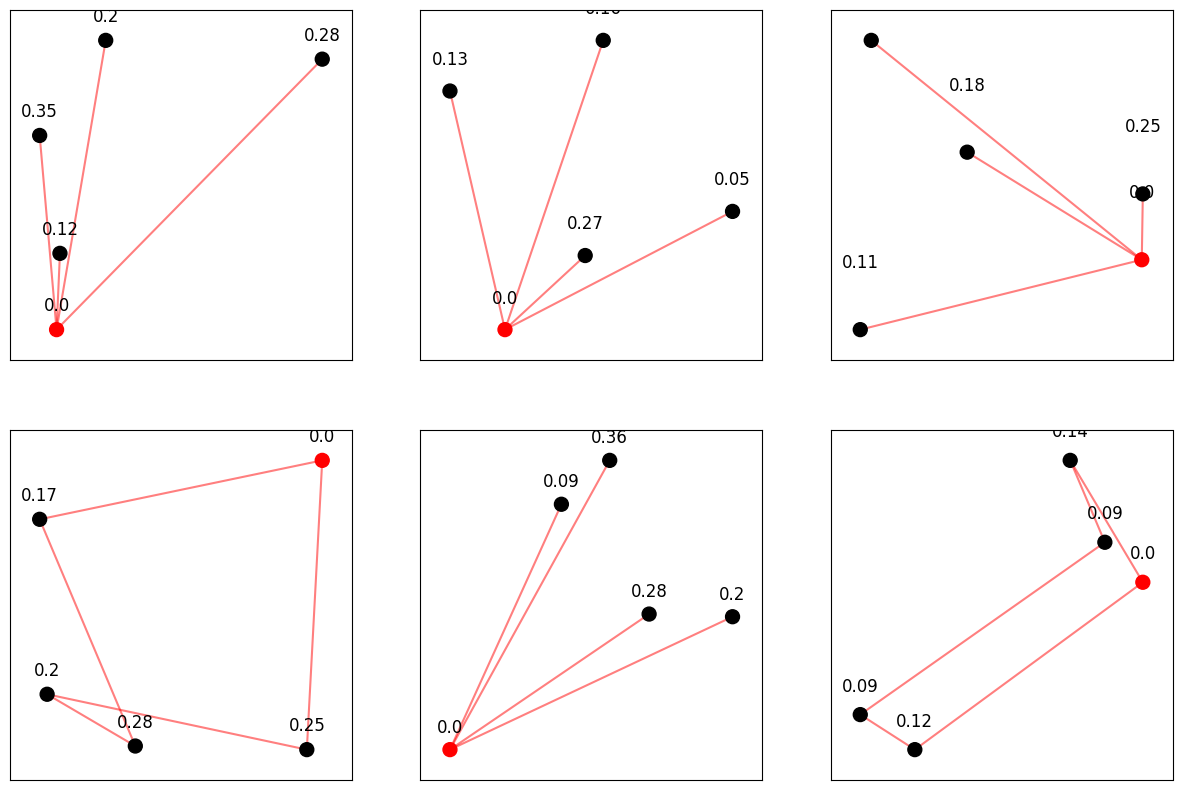

In [7]:
# Evaluate the agent
loss_a = agent.evaluate(env)

In [8]:
# Close the video recorder
env.vid.close()

Moviepy - Building video ./videos/video_test_santa_irp_5_23.mp4.
Moviepy - Writing video ./videos/video_test_santa_irp_5_23.mp4



Moviepy - Done !
Moviepy - video ready ./videos/video_test_santa_irp_5_23.mp4


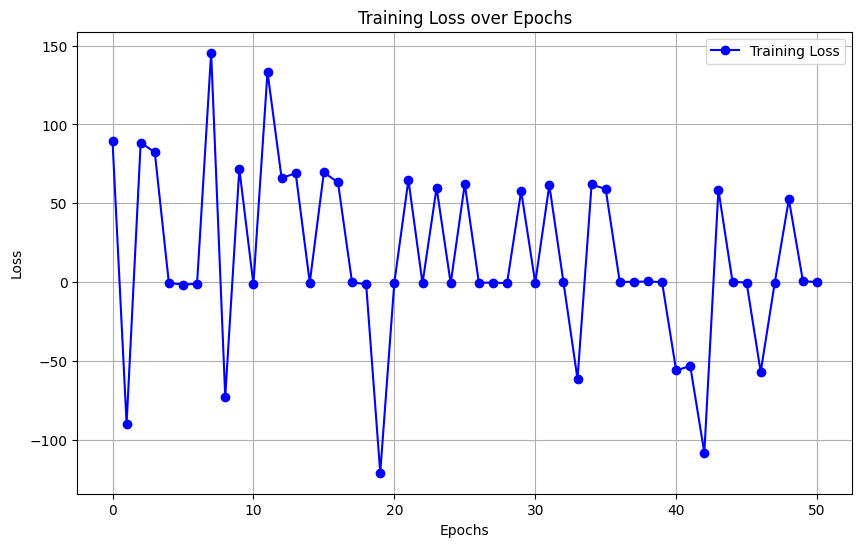

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
csv_path = f"./train_logs/loss_log_santa_irp_{num_nodes}_{seed}.csv"
data = pd.read_csv(csv_path)

# Extract the 'Epoch' and 'Loss' columns
epochs = data['Epoch']
loss = data['Loss']

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(epochs, loss, label='Training Loss', color='blue', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()
plt.grid(True)
plt.show()
